# PACEJKA MAGIC FORMULA (part 1)

The purpose of this notebook is to start from scratch in order to fully understand the effect of the different parameters involved in Pacejka's formulation. 
There may be some differences between the implementations we can find here and there on the web, so I'll stick in this first part with the notations used in the original paper :  

**Bakker, E., Nyborg, L., and Pacejka, H.B. (1987). 'Tyre modelling for use in vehicle dynamics studies'. SAE 870421**

The pdf can currently be found here : http://www.theoryinpracticeengineering.com/resources/tires/pacejka87.pdf

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import sin, atan
import numpy as np

One of the strengths of Pacejka's formula is that the same generic equation can be used both for longitudinal and lateral behaviour. The input X will be either the slip ratio (for acceleration/braking) or the slip angle (when cornering).
The output Y will be the longitudinal or the lateral force.

In the 1987 paper, the equation is decomposed in two steps : 
$$Y = D\ \sin(C\ \arctan(B\ \phi))$$
with
$$\phi = (1-E)\ X + \frac{E}{B}\ \arctan(B\ X)$$

It is often found under the one-line form : 

$$Y = D\ \sin(C\ \arctan(BX - E(BX - \arctan(BX))$$

We will begin by a **longitudinal example**, and use the numerical values provided in the paper, highlighted in yellow, corresponding to a vertical load of 4 kN.


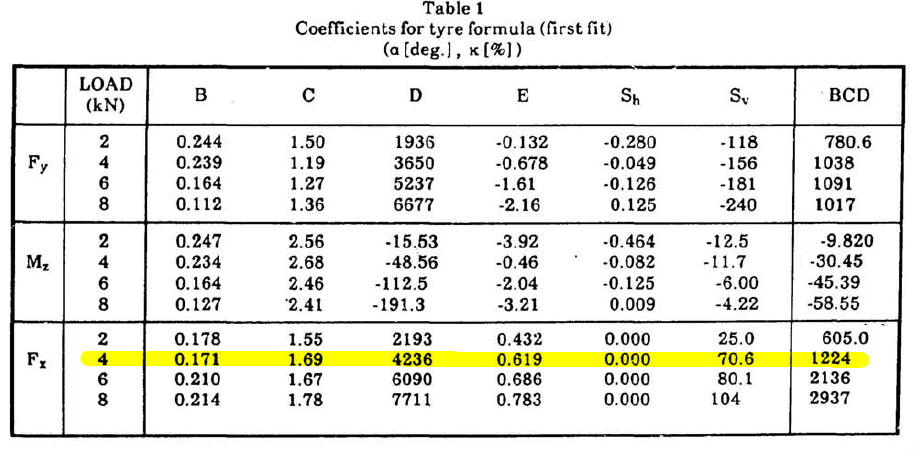

In [118]:
# Definition of Pacejka parameters
# X : longitudinal slip
# B : stiffness factor
# C : shape factor
# D : peak factor
# E : curvature factor

B = 0.171
C = 1.69
D = 4236
E = 0.619

def F(x):
    return(D * sin(C * atan(B*x - E*(B*x - atan(B*x)))))
    


Two things are important to notice : first is that X, often noted $\kappa$ (kappa) as the longitudinal slip, is expressed in % in Pacejka's paper. The corresponding value B takes this into account, since B is always used in the formula as a product B times X. In more recent literature we often see $\kappa$ as a ratio rather than a percentage, so the corresponding B value should be multiplied by 100.  
Anyway, let's stick with Pacejka's convention for the moment and assume that X varies between 0 and 100. 

In [119]:
num_points=100
X = np.linspace(0,100,100)

plt.rcParams["figure.figsize"] = (8,6) # set fig size for matplotlib

The second remark is that the peak factor D is not "normalized" here. This is the peak value ... for the corresponding vertical load (4 kN in our case). Here again we tend to see different conventions in later papers (D would be normalized, equal to 4236/4000 = 1.06, which is the max $\mu$ value of this tire).  
Once again we keep the original conventions for the moment. 

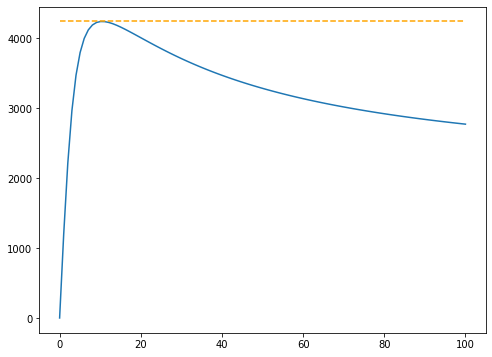

In [120]:
plt.plot(X,np.vectorize(F)(X));

# horizontal line at the max value for visualization purpose only
plt.plot(X,np.linspace(D,D,num_points),linestyle='--',color='orange');

### Effect of a variation of peak factor D
Let's make D vary between 3500 and 5000 can see below that the peak value is increased with D (darker blue means higher D), but the shape of the curve doesn't change. 

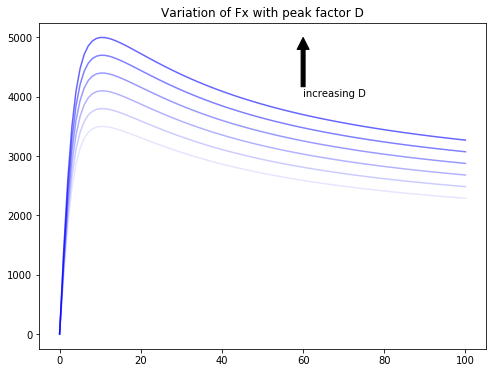

In [121]:
plt.figure()
i=0
for D in np.arange(3500,5300,300):
    i+=0.1
    plt.plot(X,np.vectorize(F)(X),color=(0.,0.,1.,i));

plt.gca().annotate('increasing D', xy=(60,5000), xytext=(60,4000),arrowprops=dict(facecolor='black'));
plt.title('Variation of Fx with peak factor D');
D = 4236 # reset

### Effect of a variation of shape factor C
Now we make C vary between 1.5 and 2.0, and see that the higher it is, the "peakier" the curve

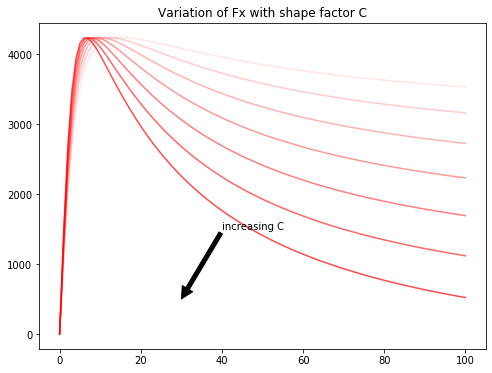

In [122]:
plt.figure()
i=0
for C in np.arange(1.5,2.1,0.1):
    i+=0.1
    plt.plot(X,np.vectorize(F)(X),color=(1.,0.,0.,i));
plt.gca().annotate('increasing C', xy=(30,500), xytext=(40,1500),arrowprops=dict(facecolor='black'));
plt.title('Variation of Fx with shape factor C');
C=1.69 # reset

From a vehicle handling point of view, a small value of C is obviously preferred to have a small decrease in tire force. 

### Effect of a variation of curvature factor E
Now let's make E vary between -2.0 and 1.0. 

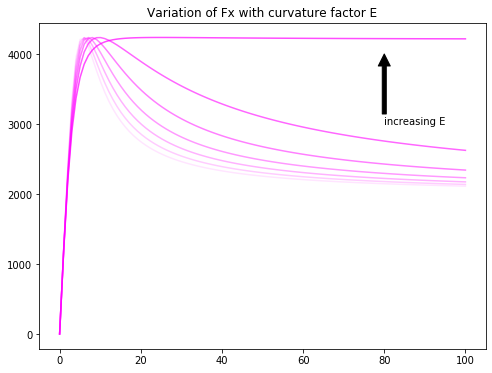

In [123]:
plt.figure()
i=0
for E in np.arange(-2.0,1.5,0.5):
    i+=0.1
    plt.plot(X,np.vectorize(F)(X),color=(1.,0.,1.,i));
plt.gca().annotate('increasing E', xy=(80,4000), xytext=(80,3000),arrowprops=dict(facecolor='black'));
plt.title('Variation of Fx with curvature factor E');
E=0.619 # reset

In opposition to C, we want E to be as high as possible to have the flattest possible curve. But physics can't be ignored, and the curve obtained for E=1.0 has been kept here for information only. It obviously never happens in real life since no tire is able to deliver a constant force whatever the slip ratio. 
If E becomes greater than 1, then $(BX - E(BX - \arctan(BX))$ gets negative for high slip (since $BX$ >> $\arctan(BX)$  for high BX), which would result in a negative force, as illustrated below : 


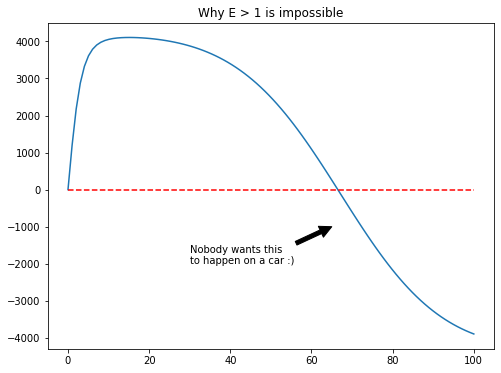

In [124]:
E=1.15 # impossible value 
plt.figure()
plt.plot(X,np.vectorize(F)(X));
plt.plot(X,np.linspace(0,0,num_points),linestyle='--',color='red');
plt.gca().annotate('Nobody wants this \nto happen on a car :)', xy=(65,-1000), xytext=(30,-2000),arrowprops=dict(facecolor='black'));
plt.title('Why E > 1 is impossible');

### Effect of a variation of stiffness factor B
The stiffness (i.e the slope of the curve at the origin) is given by BCD. If you don't trust me, you can do the math by yourself, or ask to Wolfram Alpha and check the Taylor series expansion :

https://www.wolframalpha.com/input/?i=derivative+of+d*sin%28c*arctan%28b*x%E2%88%92e*%28b*x%E2%88%92arctan%28b*x%29%29%29%29

If we assume that C and D are given, then B is the only remaining parameter to tune the stiffness. Let's make B vary from 0.12 to 0.30, and zoom on the "low" slip ratio

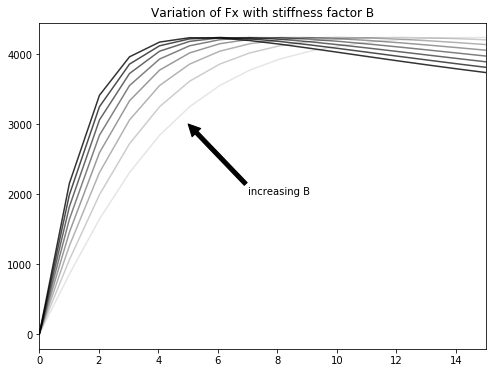

In [125]:
E=0.619 # reset
plt.figure()
i=0
for B in np.arange(0.12,0.33,0.03):
    i+=0.1
    plt.plot(X,np.vectorize(F)(X),color=(0.,0.,0.,i));
plt.gca().annotate('increasing B', xy=(5,3000), xytext=(7,2000),arrowprops=dict(facecolor='black'));
plt.xlim(0,15)
plt.title('Variation of Fx with stiffness factor B');
B=0.171 # reset